In [ ]:
import os

# Create folders to organize your files
os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)


In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload diabetic_data.csv


Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
import shutil

shutil.move("diabetic_data.csv", "data/diabetic_data.csv")


'data/diabetic_data.csv'

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/diabetic_data.csv")
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print("Shape of dataset:", df.shape)
print("Column names:\n", df.columns.tolist())

# Check types and missing
df.info()
df.describe()


Shape of dataset: (101766, 50)
Column names:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column              

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#STEP-2 EDA

In [ ]:
df['readmitted'].value_counts()


,count
readmitted,
NO,54864
>30,35545
<30,11357


In [ ]:
# Binary: 1 = readmitted within 30 days, 0 = otherwise
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
df['readmitted_flag'].value_counts()


,count
readmitted_flag,
0,90409
1,11357


In [ ]:
# Replace '?' with NaN for easy handling
df.replace('?', pd.NA, inplace=True)

# Check missing values
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


,0
weight,98569
max_glu_serum,96420
A1Cresult,84748
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21


In [ ]:
df['gender'].value_counts()


,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


In [ ]:
df = df[df['gender'] != 'Unknown/Invalid']


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101763.0,NaN,NaN,NaN,165200788.151371,102641008.176549,12522.0,84959748.0,152388294.0,230269803.0,443867222.0
patient_nbr,101763.0,NaN,NaN,NaN,54329650.435689,38696580.048954,135.0,23412964.5,45500490.0,87545713.5,189502619.0
race,99492,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101763,2,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101763,10,[70-80),26066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101763.0,NaN,NaN,NaN,2.024017,1.445414,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101763.0,NaN,NaN,NaN,3.715515,5.279919,1.0,1.0,1.0,4.0,28.0
admission_source_id,101763.0,NaN,NaN,NaN,5.754459,4.06411,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101763.0,NaN,NaN,NaN,4.396018,2.985092,1.0,2.0,4.0,6.0,14.0


#EDA


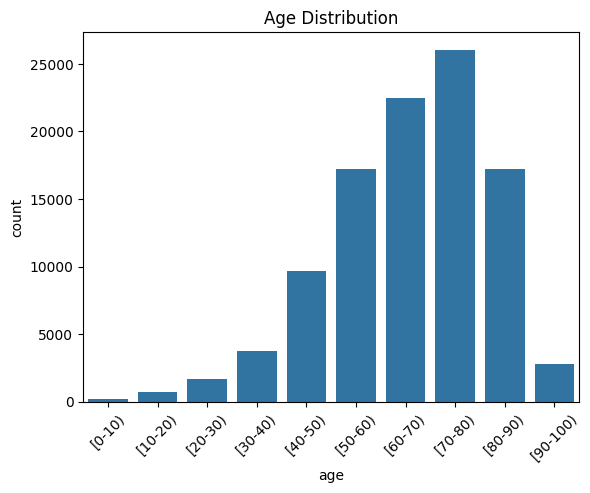

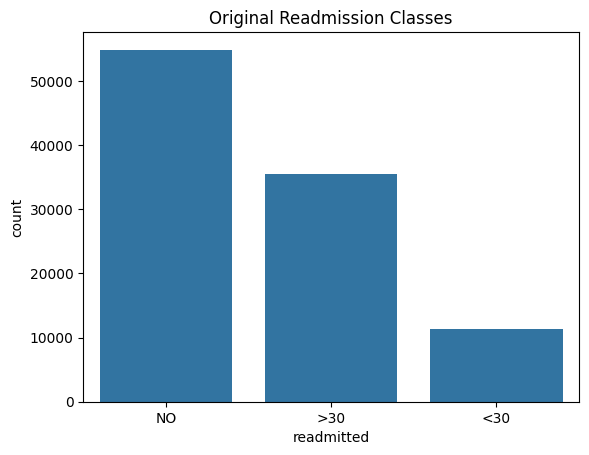

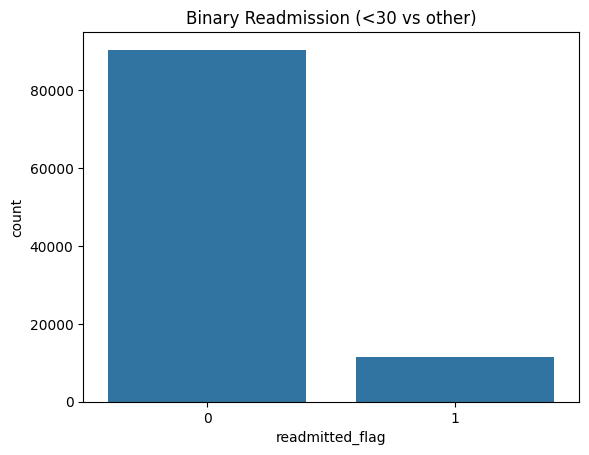

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.countplot(x='age', data=df)
plt.xticks(rotation=45)
plt.title('Age Distribution')
plt.show()

# Readmission count
sns.countplot(x='readmitted', data=df)
plt.title('Original Readmission Classes')
plt.show()

# Readmission_flag distribution
sns.countplot(x='readmitted_flag', data=df)
plt.title('Binary Readmission (<30 vs other)')
plt.show()


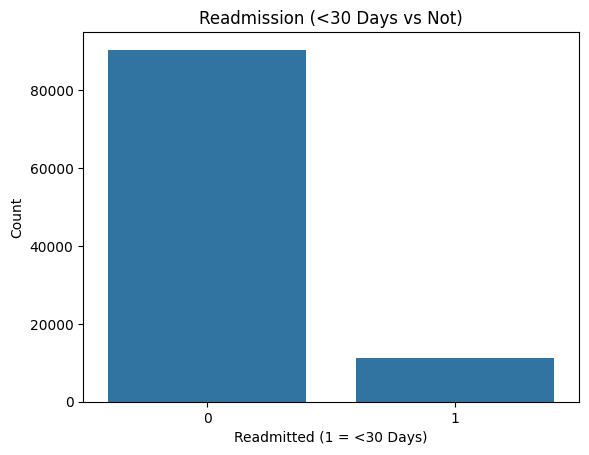

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='readmitted_flag')
plt.title('Readmission (<30 Days vs Not)')
plt.xlabel('Readmitted (1 = <30 Days)')
plt.ylabel('Count')
plt.show()


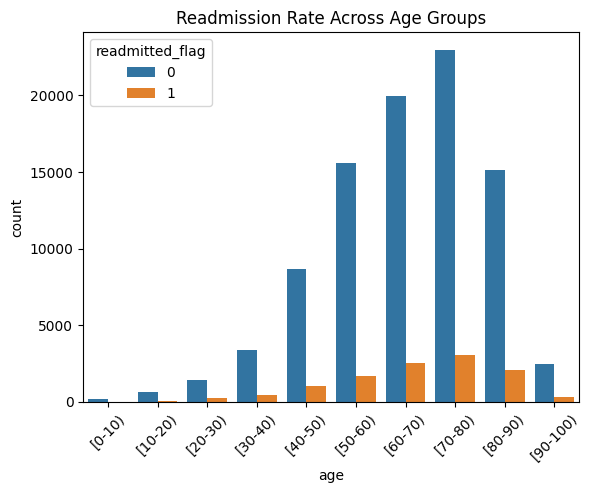

In [ ]:
sns.countplot(data=df, x='age', hue='readmitted_flag')
plt.title('Readmission Rate Across Age Groups')
plt.xticks(rotation=45)
plt.show()


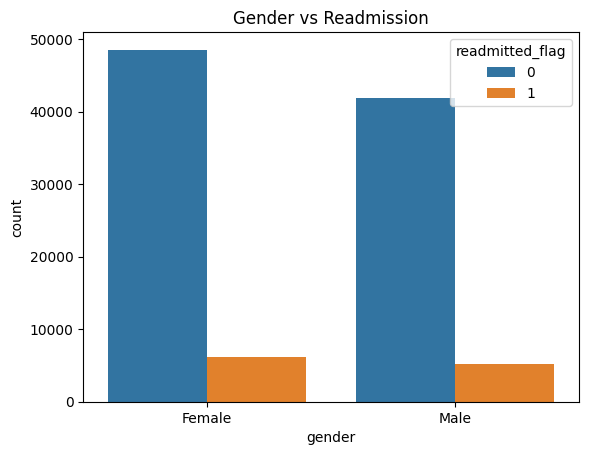

In [ ]:
sns.countplot(data=df, x='gender', hue='readmitted_flag')
plt.title('Gender vs Readmission')
plt.show()


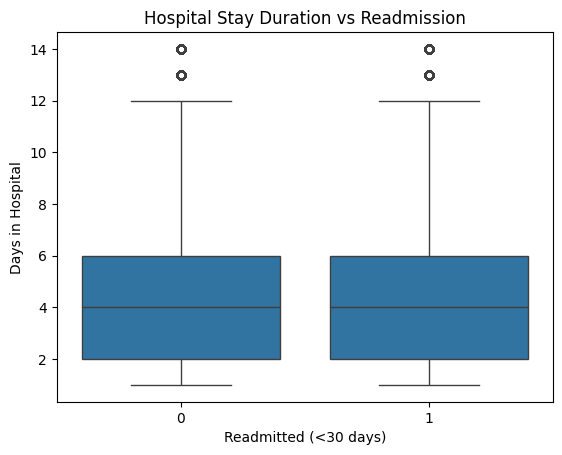

In [ ]:
sns.boxplot(x='readmitted_flag', y='time_in_hospital', data=df)
plt.title('Hospital Stay Duration vs Readmission')
plt.xlabel('Readmitted (<30 days)')
plt.ylabel('Days in Hospital')
plt.show()


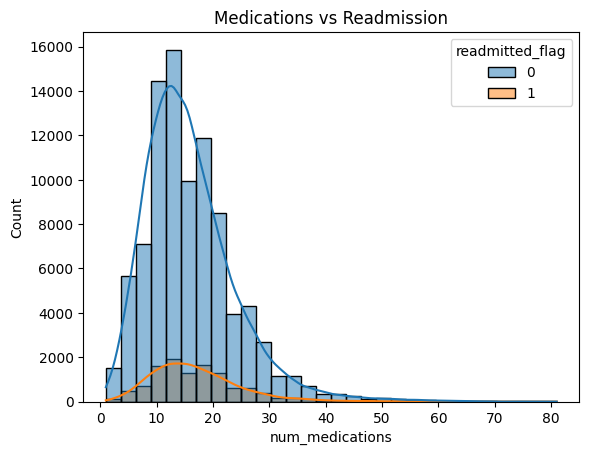

In [ ]:
sns.histplot(data=df, x='num_medications', hue='readmitted_flag', kde=True, bins=30)
plt.title('Medications vs Readmission')
plt.show()


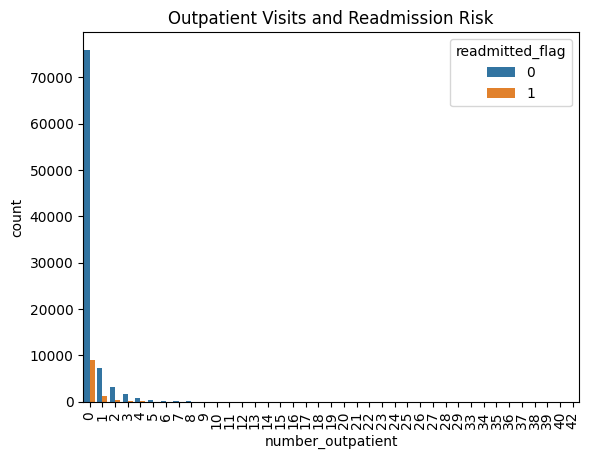

In [ ]:
sns.countplot(x='number_outpatient', hue='readmitted_flag', data=df)
plt.title('Outpatient Visits and Readmission Risk')
plt.xticks(rotation=90)
plt.show()


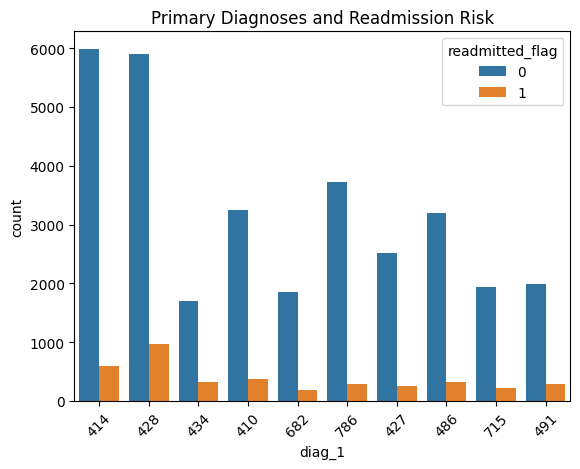

In [ ]:
# Count top 10 diag_1 codes
top_diag1 = df['diag_1'].value_counts().nlargest(10).index
sns.countplot(data=df[df['diag_1'].isin(top_diag1)], x='diag_1', hue='readmitted_flag')
plt.title('Primary Diagnoses and Readmission Risk')
plt.xticks(rotation=45)
plt.show()


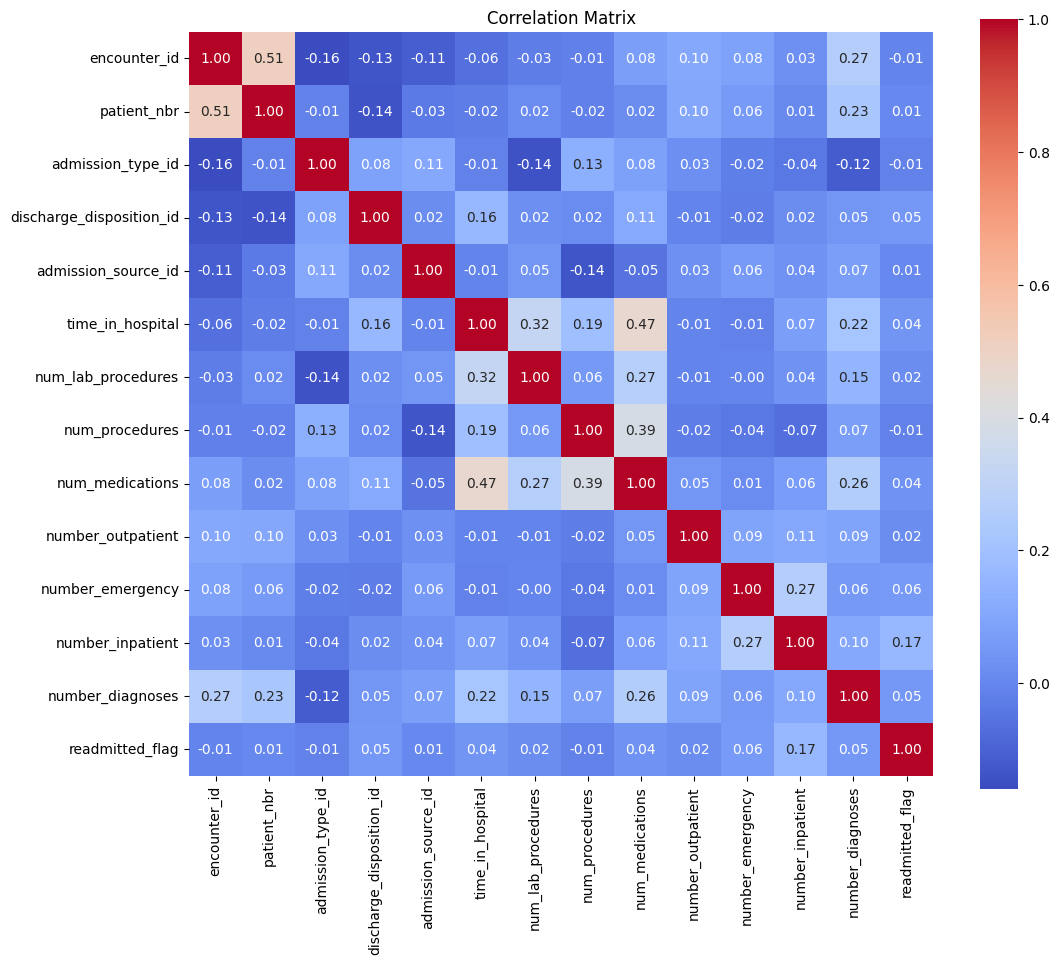

In [ ]:
import numpy as np

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.show()


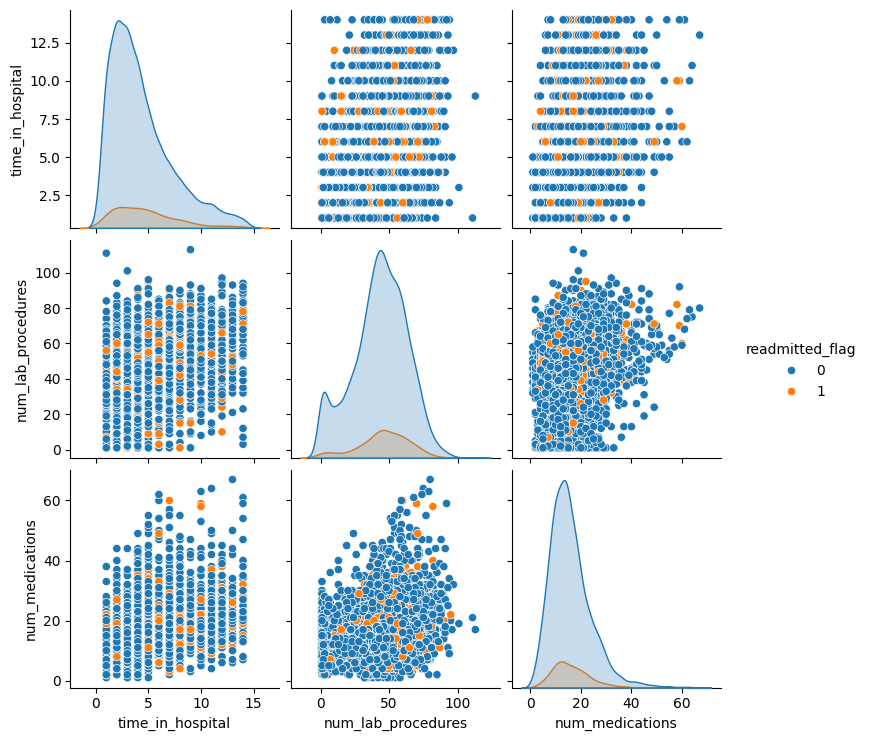

In [ ]:
sample_df = df.sample(5000, random_state=42)  # only small sample
sns.pairplot(sample_df[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted_flag']], hue='readmitted_flag')
plt.show()


#Pre-processing

In [ ]:
df.drop(columns=[
    'encounter_id', 'patient_nbr', 'weight', 'payer_code',
    'medical_specialty', 'examide', 'citoglipton',
    'readmitted'  # we already created `readmitted_flag`
], inplace=True)


In [ ]:
# Drop rows with missing diagnoses or race
df.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)


In [ ]:
def map_diag(code):
    try:
        code = float(code)
        if 390 <= code <= 459 or code == 785:
            return 'circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'digestive'
        elif 250 <= code < 251:
            return 'diabetes'
        elif 800 <= code <= 999:
            return 'injury'
        elif 710 <= code <= 739:
            return 'musculoskeletal'
        elif 580 <= code <= 629 or code == 788:
            return 'genitourinary'
        elif 140 <= code <= 239:
            return 'neoplasms'
        else:
            return 'other'
    except:
        return 'other'

df['diag_1'] = df['diag_1'].apply(map_diag)
df['diag_2'] = df['diag_2'].apply(map_diag)
df['diag_3'] = df['diag_3'].apply(map_diag)


In [ ]:
# Drug columns are from index 24 to 44 in original dataset (might change after drops)
drug_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

df[drug_cols] = df[drug_cols].replace({
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1
})


/tmp/ipython-input-61-1970267899.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[drug_cols] = df[drug_cols].replace({


In [ ]:
df = pd.get_dummies(df, columns=[
    'change', 'diabetesMed', 'gender', 'race', 'age',
    'diag_1', 'diag_2', 'diag_3'
], drop_first=True)


In [ ]:
# Encode string categories into integers
glu_map = {
    'None': 0,
    'Norm': 1,
    '>200': 2,
    '>300': 3
}
a1c_map = {
    'None': 0,
    'Norm': 1,
    '>7': 2,
    '>8': 3
}

df['max_glu_serum'] = df['max_glu_serum'].map(glu_map)
df['A1Cresult'] = df['A1Cresult'].map(a1c_map)


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
max_glu_serum,92844
A1Cresult,81859
admission_type_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0
number_outpatient,0
number_emergency,0
discharge_disposition_id,0


In [ ]:
df['max_glu_serum'] = df['max_glu_serum'].fillna(0)
df['A1Cresult'] = df['A1Cresult'].fillna(0)


In [ ]:
df.columns = df.columns.str.replace('[<>[\]()]', '', regex=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['readmitted_flag'])
y = df['readmitted_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
!pip install xgboost lightgbm


#MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=100000,class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


XGB

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LIGHT GBM

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)


[LightGBM] [Info] Number of positive: 8853, number of negative: 69588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 78441, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112862 -> initscore=-2.061836
[LightGBM] [Info] Start training from score -2.061836


In [ ]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     17398
           1       0.17      0.52      0.26      2213

    accuracy                           0.66     19611
   macro avg       0.54      0.60      0.52     19611
weighted avg       0.83      0.66      0.72     19611

ROC AUC Score: 0.6405751070067577


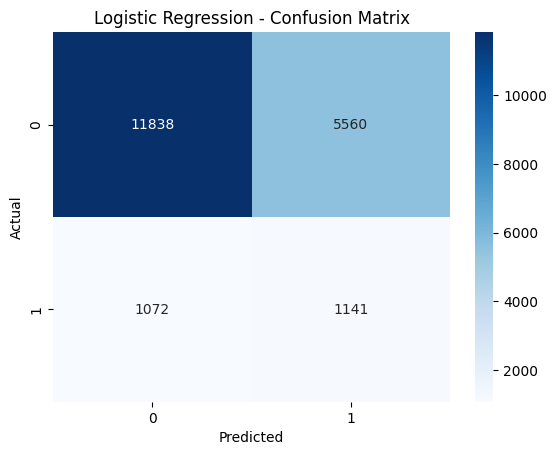


Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17398
           1       0.75      0.01      0.01      2213

    accuracy                           0.89     19611
   macro avg       0.82      0.50      0.48     19611
weighted avg       0.87      0.89      0.84     19611

ROC AUC Score: 0.6422790934256692


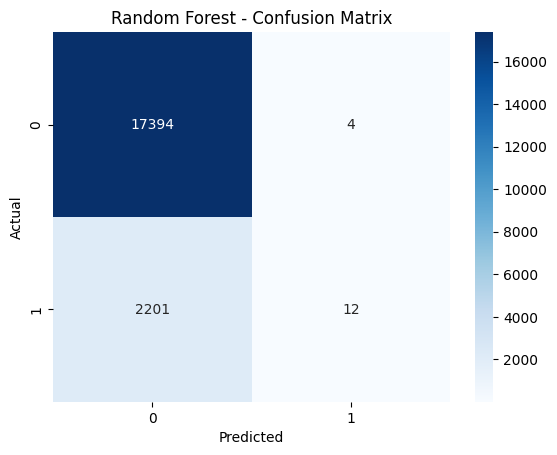


Model: XGBoost
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     17398
           1       0.18      0.51      0.27      2213

    accuracy                           0.69     19611
   macro avg       0.55      0.61      0.53     19611
weighted avg       0.84      0.69      0.74     19611

ROC AUC Score: 0.6468342731428427


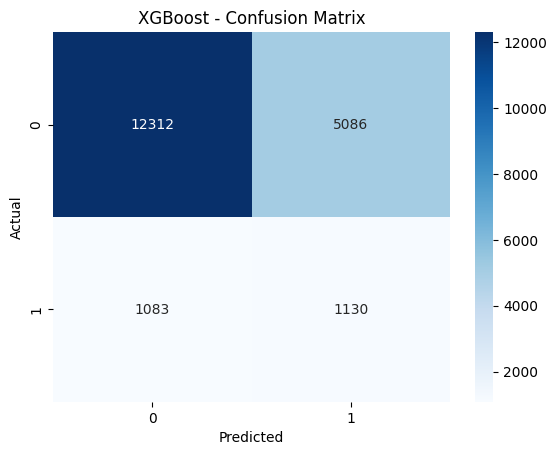


Model: LightGBM
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17398
           1       0.57      0.01      0.02      2213

    accuracy                           0.89     19611
   macro avg       0.73      0.50      0.48     19611
weighted avg       0.85      0.89      0.84     19611

ROC AUC Score: 0.6695959905639672


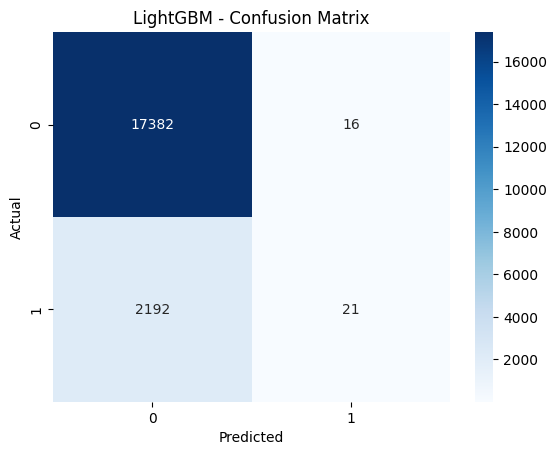

In [ ]:
evaluate_model("Logistic Regression", y_test, y_pred_lr, lr.predict_proba(X_test)[:,1])
evaluate_model("Random Forest", y_test, y_pred_rf, rf.predict_proba(X_test)[:,1])
evaluate_model("XGBoost", y_test, y_pred_xgb, xgb.predict_proba(X_test)[:,1])
evaluate_model("LightGBM", y_test, y_pred_lgb, lgb.predict_proba(X_test)[:,1])


In [ ]:
scale = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of class 0 to class 1

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='roc_auc',       # or 'f1', 'recall'
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best))


              precision    recall  f1-score   support

           0       0.93      0.66      0.77     17398
           1       0.18      0.59      0.28      2213

    accuracy                           0.65     19611
   macro avg       0.55      0.62      0.52     19611
weighted avg       0.84      0.65      0.72     19611

ROC AUC: 0.6709648885269547


In [ ]:
# Choose one example (e.g., index 0)
sample_patient = X_test.iloc[0].values.reshape(1, -1)

# Predict probability and class
readmission_prob = best_xgb.predict_proba(sample_patient)[0][1]
readmission_class = int(readmission_prob >= 0.5)

# Print result
print(f"Probability of readmission: {readmission_prob:.2f}")

if readmission_class == 1:
    print("🔴 Prediction: Patient is likely to be readmitted within 30 days.")
else:
    print("🟢 Prediction: Patient is not likely to be readmitted within 30 days.")


Probability of readmission: 0.45
🟢 Prediction: Patient is not likely to be readmitted within 30 days.


In [ ]:
import joblib

# Save model to file
joblib.dump(best_xgb, "xgb_readmission_model.pkl")


['xgb_readmission_model.pkl']

#NEURAL NETWORK

In [ ]:
!pip install scikit-learn
!pip install --upgrade imbalanced-learn --quiet
!pip install imblearn
!pip install numpy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/diabetic_data.csv")

In [ ]:
# Display general information about the dataset
print("Information of Dataset:")
display(df.info())
print("\n")

# Display descriptive statistics for numeric features
print("Description of Dataset for Numeric Features:")
display(df.describe().T.style.background_gradient(cmap='Blues'))
print("\n")

# Display descriptive statistics for categorical features
print("Description of Dataset for Categorical Features:")
display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
print("\n")

# Display percentage of null values in the dataset
print("Null Values in Dataset:")
display(df.isnull().mean() * 100)
print("\n")

# Display duplicate rows in the dataset
print("Duplicate Rows in Dataset:")
display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 no

None



Description of Dataset for Numeric Features:


,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.000000,165201645.622978,102640295.983458,12522.000000,84961194.000000,152388987.000000,230270887.500000,443867222.000000
patient_nbr,101766.000000,54330400.694947,38696359.346534,135.000000,23413221.000000,45505143.000000,87545949.750000,189502619.000000
admission_type_id,101766.000000,2.024006,1.445403,1.000000,1.000000,1.000000,3.000000,8.000000
discharge_disposition_id,101766.000000,3.715642,5.280166,1.000000,1.000000,1.000000,4.000000,28.000000
admission_source_id,101766.000000,5.754437,4.064081,1.000000,1.000000,7.000000,7.000000,25.000000
time_in_hospital,101766.000000,4.395987,2.985108,1.000000,2.000000,4.000000,6.000000,14.000000
num_lab_procedures,101766.000000,43.095641,19.674362,1.000000,31.000000,44.000000,57.000000,132.000000
num_procedures,101766.000000,1.339730,1.705807,0.000000,0.000000,1.000000,2.000000,6.000000
num_medications,101766.000000,16.021844,8.127566,1.000000,10.000000,15.000000,20.000000,81.000000
number_outpatient,101766.000000,0.369357,1.267265,0.000000,0.000000,0.000000,0.000000,42.000000




Description of Dataset for Categorical Features:


,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597




Null Values in Dataset:


,0
encounter_id,0.000000
patient_nbr,0.000000
race,0.000000
gender,0.000000
age,0.000000
weight,0.000000
admission_type_id,0.000000
discharge_disposition_id,0.000000
admission_source_id,0.000000
time_in_hospital,0.000000




Duplicate Rows in Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [ ]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.

df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty','encounter_id','patient_nbr'],inplace=True)

# Replace null values with the most frequent value in each column
for col in df.columns:
    if df[col].isnull().any():
        most_frequent_value = df[col].mode()[0]
        df[col].fillna(most_frequent_value, inplace=True)

print(df['race'].value_counts())

#replacing ? occurencies
df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

# removing null values from diag_1,2 and 3.
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)
df.drop(index=index,inplace=True)


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


In [ ]:
#Encoding
le = LabelEncoder()
df['admission_type_id'] = le.fit_transform(df['admission_type_id'])
df['discharge_disposition_id'] = le.fit_transform(df['discharge_disposition_id'])
df['admission_source_id'] = le.fit_transform(df['admission_source_id'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['age'] = le.fit_transform(df['age'])
df['diag_1'] = le.fit_transform(df['diag_1'])
df['diag_2'] = le.fit_transform(df['diag_2'])
df['diag_3'] = le.fit_transform(df['diag_3'])
df['metformin'] = le.fit_transform(df['metformin'])
df['repaglinide'] = le.fit_transform(df['repaglinide'])
df['nateglinide'] = le.fit_transform(df['nateglinide'])
df['chlorpropamide'] = le.fit_transform(df['chlorpropamide'])
df['glimepiride'] = le.fit_transform(df['glimepiride'])
df['acetohexamide'] = le.fit_transform(df['acetohexamide'])
df['glipizide'] = le.fit_transform(df['glipizide'])
df['glyburide'] = le.fit_transform(df['glyburide'])
df['tolbutamide'] = le.fit_transform(df['tolbutamide'])
df['pioglitazone'] = le.fit_transform(df['pioglitazone'])
df['rosiglitazone'] = le.fit_transform(df['rosiglitazone'])
df['acarbose'] = le.fit_transform(df['acarbose'])
df['miglitol'] = le.fit_transform(df['miglitol'])
df['troglitazone'] = le.fit_transform(df['troglitazone'])
df['tolazamide'] = le.fit_transform(df['tolazamide'])
df['insulin'] = le.fit_transform(df['insulin'])
df['glyburide-metformin'] = le.fit_transform(df['glyburide-metformin'])
df['glipizide-metformin'] = le.fit_transform(df['glipizide-metformin'])
df['glimepiride-pioglitazone'] = le.fit_transform(df['glimepiride-pioglitazone'])
df['metformin-rosiglitazone'] = le.fit_transform(df['metformin-rosiglitazone'])
df['metformin-pioglitazone'] = le.fit_transform(df['metformin-pioglitazone'])
df['change'] = le.fit_transform(df['change'])
df['diabetesMed'] = le.fit_transform(df['diabetesMed'])


#Transforming in a binary problem
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,0,0,6,3,59,0,18,...,0,3,1,0,0,0,0,0,1,0
2,0,0,2,0,0,6,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,2,1,3,0,0,6,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,2,1,4,0,0,6,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0
5,2,1,5,1,0,1,3,31,6,16,...,0,2,1,0,0,0,0,1,1,0


#MODEL TRAINING

In [ ]:
#Dataset unbalanced, using smote
sm=SMOTE(sampling_strategy='minority',random_state=42)

X = df.drop('readmitted', axis=1).values
y = df['readmitted'].values
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train_cat,
          epochs=20,
          batch_size=64,
          validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7855 - loss: 0.4537 - val_accuracy: 0.8195 - val_loss: 0.3883
Epoch 2/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8290 - loss: 0.3706 - val_accuracy: 0.8303 - val_loss: 0.3732
Epoch 3/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8392 - loss: 0.3565 - val_accuracy: 0.8364 - val_loss: 0.3658
Epoch 4/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8456 - loss: 0.3457 - val_accuracy: 0.8357 - val_loss: 0.3631
Epoch 5/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8490 - loss: 0.3399 - val_accuracy: 0.8415 - val_loss: 0.3533
Epoch 6/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8551 - loss: 0.3301 - val_accuracy: 0.8417 - val_loss: 0.3537
Epoch 7/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8563 - loss: 0.3264 - val_accuracy: 0.8456 - val_loss: 0.3495
Epoch 8/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.3189

In [ ]:
from sklearn.metrics import classification_report

# Predict on test
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))


1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17771
           1       0.89      0.81      0.85     17827

    accuracy                           0.86     35598
   macro avg       0.86      0.86      0.86     35598
weighted avg       0.86      0.86      0.86     35598



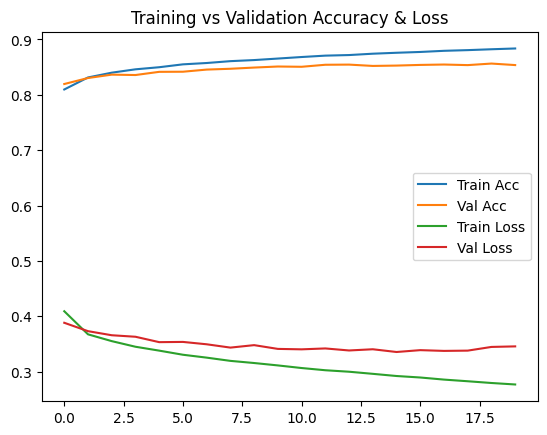

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Accuracy & Loss")
plt.show()


1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


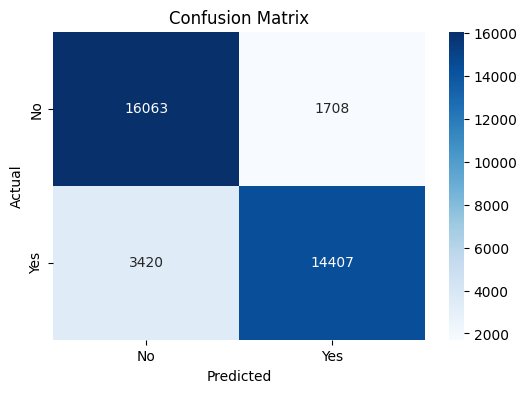

Classification Report:
              precision    recall  f1-score   support

  No Readmit       0.82      0.90      0.86     17771
  Readmitted       0.89      0.81      0.85     17827

    accuracy                           0.86     35598
   macro avg       0.86      0.86      0.86     35598
weighted avg       0.86      0.86      0.86     35598



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict labels (not probabilities)
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["No Readmit", "Readmitted"]))


In [ ]:
# Pick a single patient (e.g., index 0)
sample_patient = X_test[1].reshape(1, -1)

# Predict class and probability
prob = model.predict(sample_patient)[0][1]  # Probability of class 1


print(f"Probability of readmission: {prob:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Probability of readmission: 1.00


In [ ]:
# Predict probabilities on test set
y_pred_probs = model.predict(X_test)

# Get predicted class labels (0 or 1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Show first 20 predictions with probability and actual label
for i in range(20):
    prob = y_pred_probs[i][1]  # Probability of class 1 (readmitted)
    pred = y_pred_classes[i]
    actual = y_test[i]
    print(f"Patient {i+1}: Predicted = {pred}, Prob(Readmit) = {prob:.2f}, Actual = {actual}")


1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Patient 1: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 2: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 3: Predicted = 0, Prob(Readmit) = 0.07, Actual = 0
Patient 4: Predicted = 0, Prob(Readmit) = 0.17, Actual = 0
Patient 5: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 6: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 7: Predicted = 0, Prob(Readmit) = 0.03, Actual = 0
Patient 8: Predicted = 0, Prob(Readmit) = 0.32, Actual = 0
Patient 9: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 10: Predicted = 0, Prob(Readmit) = 0.18, Actual = 1
Patient 11: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 12: Predicted = 0, Prob(Readmit) = 0.13, Actual = 0
Patient 13: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 14: Predicted = 1, Prob(Readmit) = 0.56, Actual = 0
Patient 15: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patient 16: Predicted = 1, Prob(Readmit) = 1.00, Actual = 1
Patien

In [ ]:
model.save("nn_readmission_model.h5")


In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']